In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('non_zero_data.csv')
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 5745 non-null   bool   
 1   genre_ids             5745 non-null   object 
 2   id                    5745 non-null   int64  
 3   original_language     5745 non-null   object 
 4   popularity            5745 non-null   float64
 5   release_date          5745 non-null   object 
 6   title                 5745 non-null   object 
 7   vote_average          5745 non-null   float64
 8   vote_count            5745 non-null   int64  
 9   revenue               5745 non-null   float64
 10  production_companies  5745 non-null   object 
 11  budget                5745 non-null   float64
 12  release_year          5745 non-null   int64  
 13  release_month         5745 non-null   int64  
 14  num_genres            5745 non-null   int64  
 15  release_season       

In [4]:
data.describe()

,id,popularity,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio
count,5.745000e+03,5745.000000,5745.000000,5745.000000,5.745000e+03,5.745000e+03,5745.000000,5745.000000,5745.000000,5745.000000
mean,1.295379e+05,35.501507,6.630684,2706.511923,1.091273e+08,3.628044e+07,2003.085988,7.044560,2.684595,68.181639
std,2.033229e+05,38.159271,0.774388,3668.241251,1.928114e+08,4.461550e+07,15.639287,3.390513,1.014903,4543.623542
min,5.000000e+00,0.600000,2.899000,300.000000,2.000000e+00,5.000000e+00,1915.000000,1.000000,1.000000,0.000241
25%,8.832000e+03,20.756000,6.122000,639.000000,1.323146e+07,8.000000e+06,1996.000000,4.000000,2.000000,0.222150
50%,1.349700e+04,27.424000,6.644000,1344.000000,4.270000e+07,2.000000e+07,2007.000000,7.000000,3.000000,0.444435
75%,2.079320e+05,39.597000,7.182000,3125.000000,1.197000e+08,4.500000e+07,2014.000000,10.000000,3.000000,1.013088
max,1.160164e+06,1398.123000,8.704000,35429.000000,2.923706e+09,4.600000e+08,2024.000000,12.000000,7.000000,344112.500000


# Converting categorical to numeric
Using onehotenconder and labelencoder, to convert categorical a numeric value. This is done for correlation.

In [5]:
#newcopy of data
df1=data.copy()

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = df1[['original_language','release_season']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Drop the original'production_companies' column
df1.drop(columns=['production_companies','id'], inplace=True)

df1.head()

,adult,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,19000000.0,2001,7,3,Summer,0.069110


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 5745 non-null   bool   
 1   genre_ids             5745 non-null   object 
 2   original_language     5745 non-null   object 
 3   popularity            5745 non-null   float64
 4   release_date          5745 non-null   object 
 5   title                 5745 non-null   object 
 6   vote_average          5745 non-null   float64
 7   vote_count            5745 non-null   int64  
 8   revenue               5745 non-null   float64
 9   budget                5745 non-null   float64
 10  release_year          5745 non-null   int64  
 11  release_month         5745 non-null   int64  
 12  num_genres            5745 non-null   int64  
 13  release_season        5745 non-null   object 
 14  budget_revenue_ratio  5745 non-null   float64
dtypes: bool(1), float64(5

In [7]:
# Filter out numeric columns
numeric_data = df1.select_dtypes(include=['number'])

#combine ohe data and numeric data
dfcat = pd.concat([data_cat_ohe, numeric_data], 
                           sort = False, axis = 1)
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_language_ar   5745 non-null   float64
 1   original_language_bs   5745 non-null   float64
 2   original_language_cn   5745 non-null   float64
 3   original_language_da   5745 non-null   float64
 4   original_language_de   5745 non-null   float64
 5   original_language_el   5745 non-null   float64
 6   original_language_en   5745 non-null   float64
 7   original_language_es   5745 non-null   float64
 8   original_language_fa   5745 non-null   float64
 9   original_language_fi   5745 non-null   float64
 10  original_language_fr   5745 non-null   float64
 11  original_language_gl   5745 non-null   float64
 12  original_language_hi   5745 non-null   float64
 13  original_language_hu   5745 non-null   float64
 14  original_language_id   5745 non-null   float64
 15  orig

# Which variable is the top predictor of popularity?
Looking at numeric data relation with ratings. what are the top 10 predictor with the highest correlation with popularity?

In [8]:
correlation = dfcat.corr()['popularity'].abs().sort_values(ascending=False)

# Compute the correlation matrix
correlation_matrix = dfcat.corr()

# Sort the correlations with 'vote_average' in descending order
vote_average_correlation = correlation_matrix['popularity'].sort_values(ascending=False)[1:11]
# Display the top predictors of 'vote_average'
print("Top predictors of popularity: \n")
print(vote_average_correlation)

Top predictors of popularity: 

revenue                  0.383219
vote_count               0.375725
budget                   0.363796
vote_average             0.193538
release_year             0.166257
num_genres               0.100402
original_language_en     0.088680
original_language_ja     0.035710
original_language_uk     0.018571
release_season_Summer    0.015933
Name: popularity, dtype: float64


# Model training.

Explore and determine which model is suitable for this regression problem. Using Multi-Variate linear regression model with the  most suitable predictor: revenue, vote_count, budget, vote average, release_year,and num_genres.

# Model 1: Linear Regression

Coefficients:
revenue: 2.313204311713676e-08
vote_count: 0.001325763153979722
budget: 1.2372783029113849e-07
vote_average: 7.546996084510995
release_year: 0.2825143975537537
num_genres: 1.5624931069888157


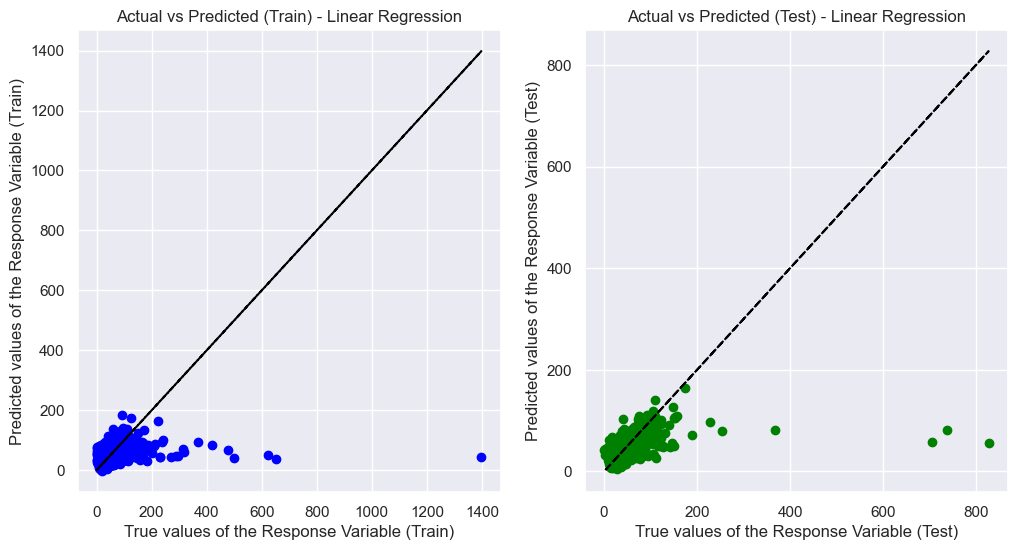

Linear Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19892522814706715
Mean Squared Error (MSE) 	: 1092.2997462601834

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2232187857103155
Mean Squared Error (MSE) 	: 1343.565484222492



In [9]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["revenue", "vote_count", "budget", "vote_average", "release_year", "num_genres"]

# Extract predictors and response variable
X = pd.DataFrame(dfcat[predictors])
y = pd.DataFrame(dfcat['popularity'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# Initialize and train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

#coeficcient
print("Coefficients:")
for feature, coef in zip(predictors, linreg.coef_[0]):
    print(f"{feature}: {coef}")


# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Linear Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Linear Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 2: Ridge Regression

C:\Users\drack\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.02101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


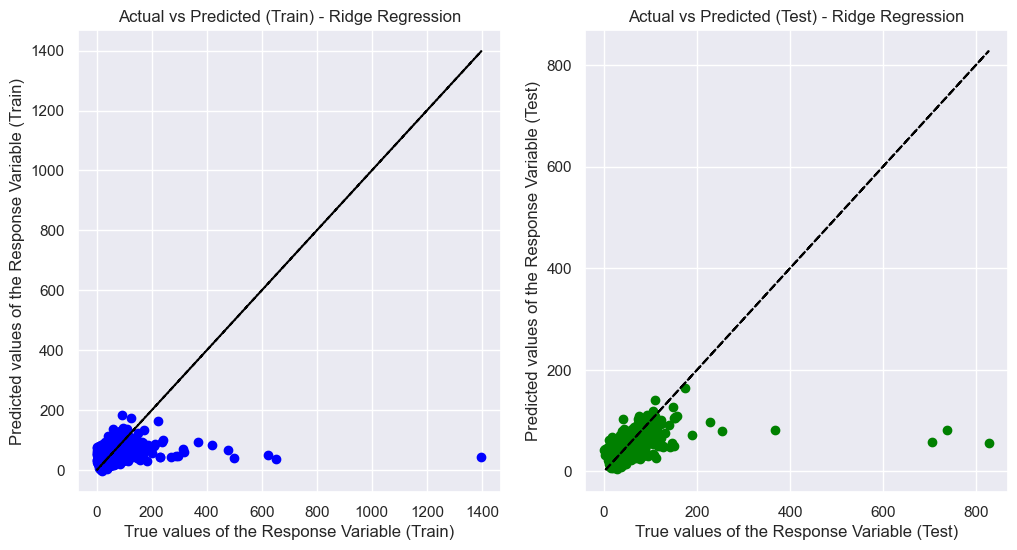

Ridge Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19892522809692914
Mean Squared Error (MSE) 	: 1092.2997463285487

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2232187913374729
Mean Squared Error (MSE) 	: 1343.5654744894368


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Define predictors and response variable
predictors = ["revenue", "vote_count", "budget", "vote_average", "release_year", "num_genres"]
X = pd.DataFrame(dfcat[predictors])
y = pd.DataFrame(dfcat['popularity'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Ridge Regression model
ridge_regressor = Ridge(alpha=0.1)  # To modify the regularization strength 

# Train the model
ridge_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)

# Plot actual vs predicted values for Ridge Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Ridge Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Ridge Regression')

plt.show()

# Calculate R^2 accuracy and MSE on the train and test sets
r2_accuracy_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_accuracy_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Ridge Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_accuracy_train)
print("Mean Squared Error (MSE) \t:", mse_train)
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_accuracy_test)
print("Mean Squared Error (MSE) \t:", mse_test)


# Model 3: Gradient Boosting Regression

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define predictors and response variable
predictors = ["revenue", "vote_count", "budget", "vote_average", "release_year", "num_genres"]
X = dfcat[predictors]
y = dfcat['popularity']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Gradient Boosting Regression model
gbr_regressor = GradientBoostingRegressor()

# Train the model
gbr_regressor.fit(X_train, y_train)

# Predictions
y_train_pred = gbr_regressor.predict(X_train)
y_test_pred = gbr_regressor.predict(X_test)

# Calculate R^2 accuracy and MSE for Gradient Boosting Regression
gbr_r2_train = r2_score(y_train, y_train_pred)
gbr_r2_test = r2_score(y_test, y_test_pred)
gbr_mse_train = mean_squared_error(y_train, y_train_pred)
gbr_mse_test = mean_squared_error(y_test, y_test_pred)

print("Gradient Boosting Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t", gbr_r2_train)
print("Mean Squared Error (MSE) \t", gbr_mse_train)
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t", gbr_r2_test)
print("Mean Squared Error (MSE) \t:", gbr_mse_test)
print()


Gradient Boosting Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	 0.8394528578887949
Mean Squared Error (MSE) 	 218.91290145767056

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	 0.5366277408211565
Mean Squared Error (MSE) 	: 801.475321913125



# Model 3.5: Gradient Boosting Regression with GridSearchCV tuning

Optimizing Gradient Boosting Regression by implementing GridSearchCV. It will tune by adjusting the parameter and check which perameter settings will lead to the best result. It also has a feature to show which feature is important in predicting popularity as seen in the chart.

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

Gradient Boosting Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8394528578887949
Mean Squared Error (MSE) 	: 218.91290145767056

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.582399687318772
Mean Squared Error (MSE) 	: 722.3055295332844



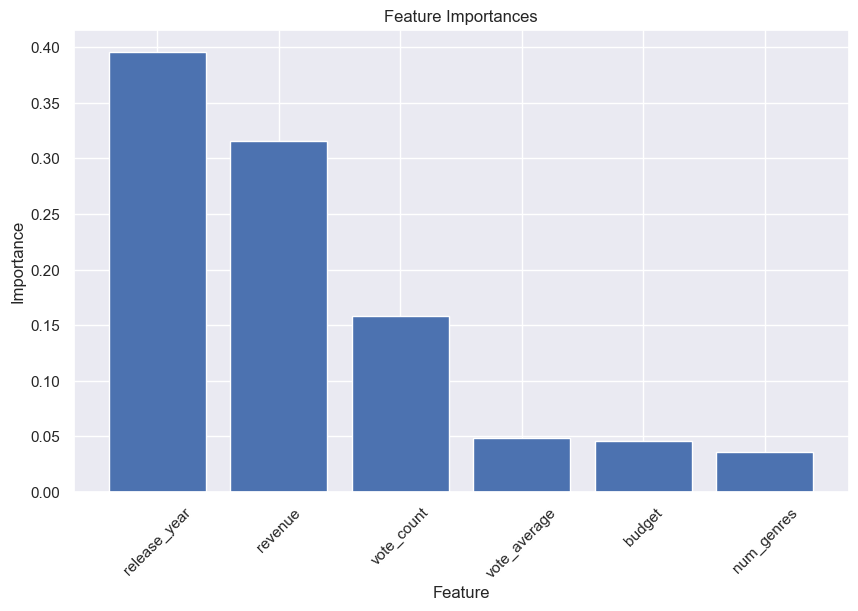

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Define predictors and response variable
predictors = ["revenue", "vote_count", "budget", "vote_average", "release_year", "num_genres"]
X = dfcat[predictors]
y = dfcat['popularity']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Gradient Boosting Regression model
gbr_regressor = GradientBoostingRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gbr_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best estimator
best_gbr = grid_search.best_estimator_

# Predictions on the train and test sets
y_pred_train = best_gbr.predict(X_train)
y_pred_test = best_gbr.predict(X_test)

# Calculate R^2 accuracy and MSE on the train set
r2_accuracy_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate R^2 accuracy and MSE on the test set
r2_accuracy_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print Gradient Boosting Regression results
print()
print("Gradient Boosting Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_accuracy_train)
print("Mean Squared Error (MSE) \t:", mse_train)
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_accuracy_test)
print("Mean Squared Error (MSE) \t:", mse_test)
print()

# Visualize feature importances
feature_importances = best_gbr.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [predictors[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), sorted_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


# Model 4: Decision Tree Regressor

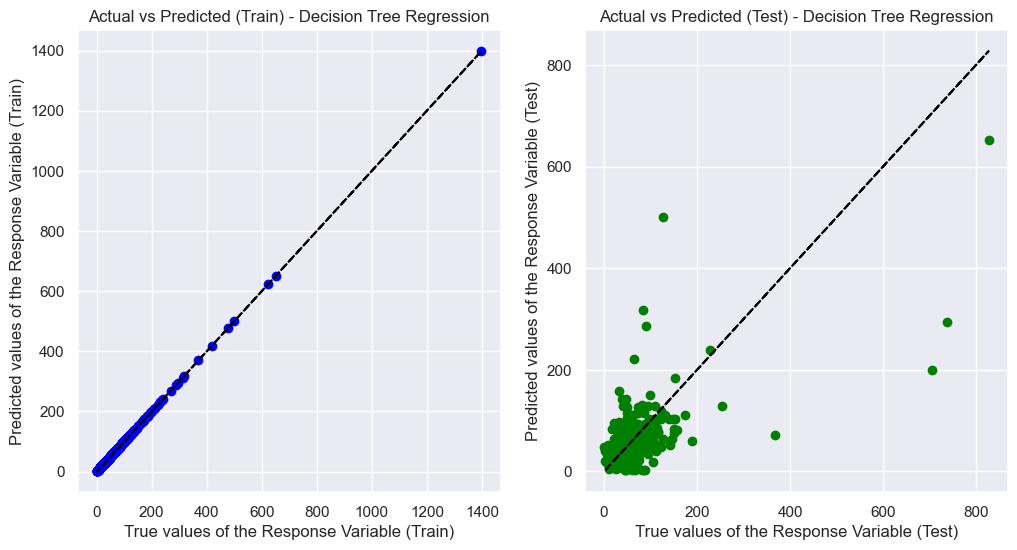

Decision Tree Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45704059749347015
Mean Squared Error (MSE) 	: 939.1338244565067



In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["revenue", "vote_count", "budget","vote_average","release_year","num_genres"]

# Extract predictors and response variable
X = pd.DataFrame(dfcat[predictors])
y = pd.DataFrame(dfcat['popularity'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# Initialize and train Linear Regression model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Predictions
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)


# Plot actual vs predicted values for decision tree Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Decision Tree Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Decision Tree Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Decision Tree Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 5: Random Forest Regressor

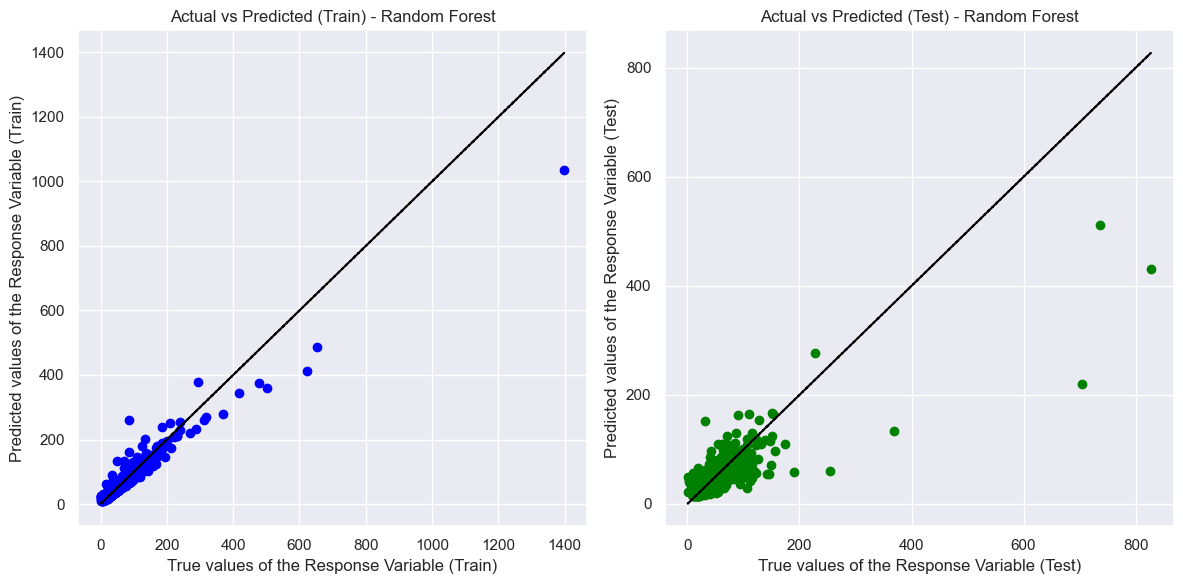

Random Forest Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9245183253122246
Mean Squared Error (MSE) 	: 102.92249488526816

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6687073751256755
Mean Squared Error (MSE) 	: 573.022786558554

Feature Importances (sorted):
release_year: 0.3696862034240354
revenue: 0.2319740949035819
vote_count: 0.22167226449884972
vote_average: 0.07856089239745966
budget: 0.06554229120010933
num_genres: 0.032564253575964146


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

predictors = ["revenue", "vote_count", "budget","vote_average","release_year","num_genres"]

# Extract predictors and response variable
X = dfcat[predictors]
y = dfcat['popularity']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train Random Forest Regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_reg.feature_importances_

# Predictions
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Random Forest')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Random Forest')

plt.tight_layout()
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Random Forest Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_rf))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_rf))
print()

# Print feature importances
print("Feature Importances (sorted):")
sorted_importances = sorted(zip(predictors, feature_importances), key=lambda x: x[1],reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


We can see that in test dataset, Random Forest Regressor has the highest explained variance while having lowest Mean Squared Error.

Therefore, Random Forest Reression is the better model and is more suitable.

# Prediction of Popularity
Can we predict the popularity value of movies using the Regression Model derived above?
Predict the popularity of the movie "Furious 7", "Out of Time", and "Superbad"

In [15]:
movie_ratings_pred = data[data["title"].isin(["Furious 7", "Out of Time", "Superbad"])]
movie_ratings_pred

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
1299,False,[35],8363,en,55.458,2007-03-20,Superbad,7.241,6931,1.708000e+08,"['Columbia Pictures', 'Apatow Productions']",20000000.0,2007,3,1,Spring,0.117096
1311,False,"[28, 53, 80]",168259,en,72.224,2015-04-01,Furious 7,7.235,10251,1.515400e+09,"['Original Film', 'One Race', 'Universal Pictu...",190000000.0,2015,4,3,Spring,0.125379
3776,False,"[53, 80, 18]",2116,en,22.758,2003-10-03,Out of Time,6.325,1101,5.549556e+07,"['Monarch Pictures', 'Original Film', 'Metro-G...",50000000.0,2003,10,3,Fall,0.900973


In [16]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(movie_ratings_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rf_reg.predict(X_pred)
y_pred

array([53.00483, 66.11483, 23.29044])

In [17]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns=["Pred_Popularity"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([movie_ratings_pred[["title", "popularity"]], y_pred], axis=1)

y_errs = 100*abs(movie_ratings_pred["popularity"] - y_pred["Pred_Popularity"]) / movie_ratings_pred["popularity"]
y_errs = pd.DataFrame(y_errs, columns=["Error_percentage"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([moviedata_acc, y_errs], axis=1)

moviedata_acc

,title,popularity,Pred_Popularity,Error_percentage
1299,Superbad,55.458,53.00483,4.423474
1311,Furious 7,72.224,66.11483,8.458643
3776,Out of Time,22.758,23.29044,2.339573


The model predicted popularity of 3 movies rather accurately with variable "revenue", "vote_count", and "budget","vote_average,"release_year","num_genres". The highest error as shown is 8.46% off the actual value. Therefore to predict any movie poplarity this model is suitable. On top of that, release year, revenue, and vote count is the most important factor when it comes to predicting popularity.